### load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### load Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Clean Data

In [ ]:
train = train.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1)

In [10]:
test = test.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:

object_columns = train.select_dtypes(include='object').columns.tolist()
print(object_columns)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [13]:

col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


le_dict = {}

for c in col:
    le = LabelEncoder()
    le.fit(train[c])
    train[c] = le.transform(train[c])
    le_dict[c] = le

print(train.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...              0          0   
1            3          0          2  ...              0          0   
2            3          0          4  ...              0          0   
3            3          0          0  ...            272          0   
4            3          0          2  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8         

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:

col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

le_dict = {}

for c in col:
    le = LabelEncoder()
    le.fit(test[c])
    test[c] = le.transform(test[c])
    le_dict[c] = le

print(test.head())


     Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         2         80.0    11622       1         3   
1  1462          20         3         81.0    14267       1         0   
2  1463          60         3         74.0    13830       1         0   
3  1464          60         3         78.0     9978       1         0   
4  1465         120         3         43.0     5005       1         0   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            3          0          4  ...            0              0   
1            3          0          0  ...           36              0   
2            3          0          4  ...           34              0   
3            3          0          4  ...           36              0   
4            1          0          4  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0    

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [17]:
a = train.isnull().sum()
a

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [18]:
a[a>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [19]:

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace=True)


<AxesSubplot:>

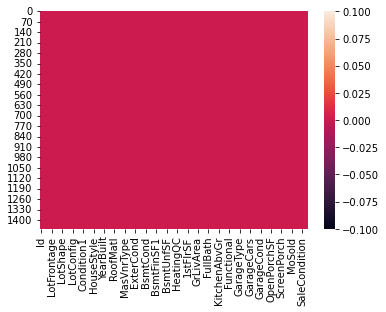

In [20]:
sns.heatmap(train.isnull())

In [21]:
b = test.isnull().sum()
b[b>0]


LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [22]:
col = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for c in col:
    test[c].fillna(test[c].mean(), inplace=True)

print(test.head())


     Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         2         80.0    11622       1         3   
1  1462          20         3         81.0    14267       1         0   
2  1463          60         3         74.0    13830       1         0   
3  1464          60         3         78.0     9978       1         0   
4  1465         120         3         43.0     5005       1         0   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            3          0          4  ...            0              0   
1            3          0          0  ...           36              0   
2            3          0          4  ...           34              0   
3            3          0          4  ...           36              0   
4            1          0          4  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0    

<AxesSubplot:>

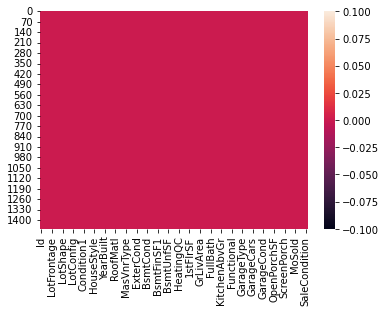

In [23]:
sns.heatmap(test.isnull())

### Data Analysis

In [24]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [25]:
train.duplicated().sum()

0

In [26]:
train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.009601,-0.033226,0.008916,0.032122,-0.019659,1.332409e-02,0.049756,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.357056,-0.139781,-0.024969,0.119289,-0.002940,-2.284384e-02,0.075910,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.106363,-0.034452,0.087654,0.061887,-0.017854,-1.192034e-03,-0.009895,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.009601,-0.357056,-0.106363,1.000000,0.306795,-0.037323,-0.144931,-0.075647,-5.447825e-18,-0.181253,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
LotArea,-0.033226,-0.139781,-0.034452,0.306795,1.000000,-0.197131,-0.165315,-0.149083,1.012318e-02,-0.121161,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.010158,0.001205,0.003690,-0.033455,-0.011599,-5.155166e-02,0.018902,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.036449,0.020507,2.335254e-02,-0.005992,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.030846,0.012292,0.014339,-0.000911,-0.025754,-1.267697e-01,0.014325,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.058464,0.034169,0.006064,-0.038118,0.033809,-8.970068e-02,0.051579,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


<AxesSubplot:>

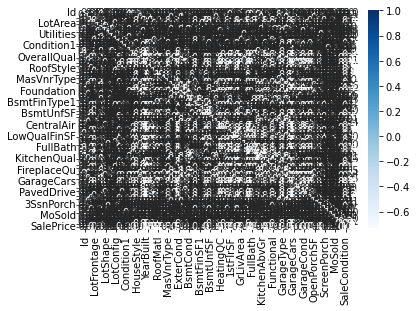

In [27]:
sns.heatmap(train.corr(), annot = True, fmt = '.1f',linewidth = 0.1,cmap = 'Blues')

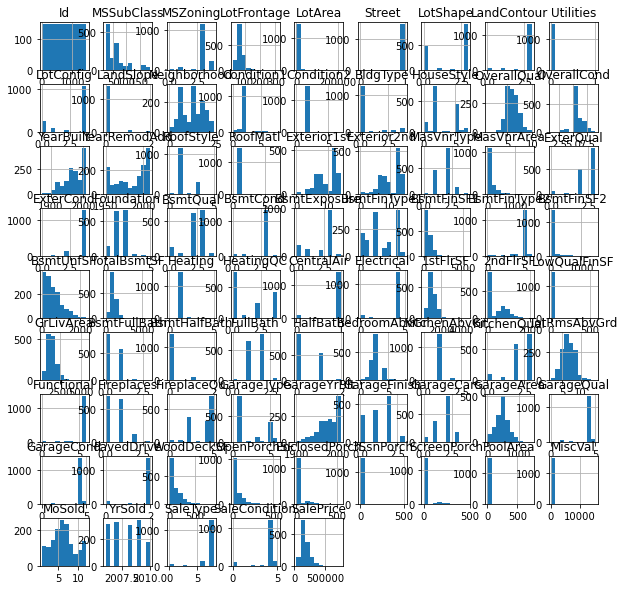

In [28]:
train.hist(figsize=(10,10))
plt.show()

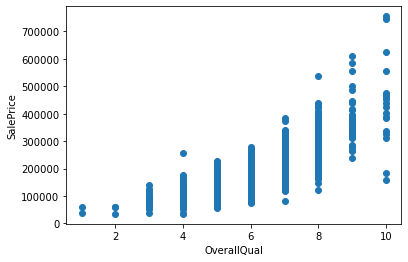

In [29]:
plt.scatter(train['OverallQual'], train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


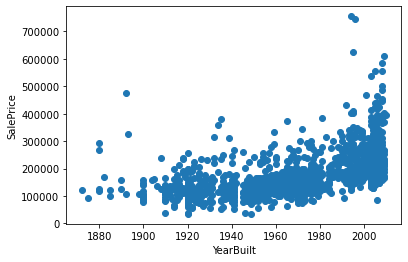

In [28]:
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()


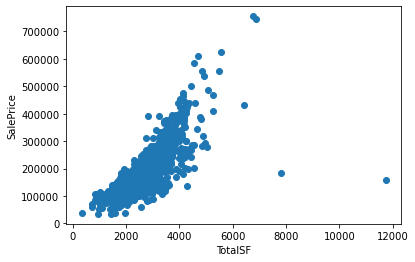

In [29]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

plt.scatter(train['TotalSF'], train['SalePrice'])
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()


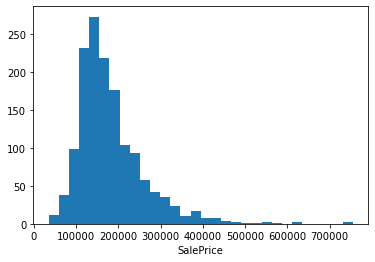

In [30]:
plt.hist(train['SalePrice'], bins=30)
plt.xlabel('SalePrice')
plt.show()


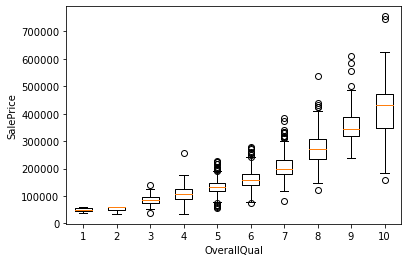

In [31]:
plt.boxplot([train['SalePrice'][train['OverallQual'] == i] for i in range(1, 11)])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


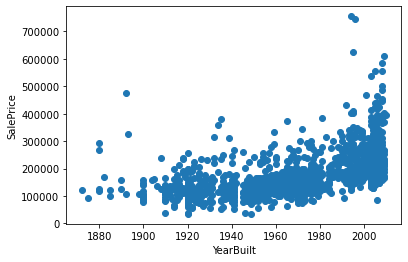

In [32]:
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()


## create model

In [30]:
X = train.drop('SalePrice',axis = 1)
y = train.SalePrice

In [31]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.20,shuffle = True,
                                                   random_state = 1)

In [41]:
model = XGBRegressor(n_estimators = 200, max_depth =  3 , learning_rate = 0.4)
model.fit(X_train,y_train)
pre = model.predict(X_test)
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)
print("train score is",score_train,"test score is",score_test)

mse = mean_squared_error(y_test, pre)
rmse = mean_squared_error(y_test, pre, squared=False)
mae = mean_absolute_error(y_test, pre)
r = r2_score(y_test, pre)

print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE = {mae}')
print(f'R = {r}')

train score is 0.9973492075371804 test score is 0.9108067205104331
MSE = 636121418.8861504
RMSE = 25221.447596959028
MAE = 16569.688188944776
R = 0.9108067205104331


In [42]:
prex = model.predict(test)
prex

array([115529.61, 180106.73, 188998.27, ..., 153873.14, 121292.24,
       233596.03], dtype=float32)

In [43]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,24,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,32,0,0,0,0,700,7,2006,8,4


In [44]:

final = test.Id

new_data = pd.DataFrame({"Id":final,"SalePrice":prex})

new_data



,Id,SalePrice
0,1461,115529.609375
1,1462,180106.734375
2,1463,188998.265625
3,1464,190445.250000
4,1465,180767.828125
...,...,...
1454,2915,85513.468750
1455,2916,70393.968750
1456,2917,153873.140625
1457,2918,121292.242188


In [ ]:


new_data.to_csv("predict for House Prices .csv",index = False)




In [46]:
import pickle

with open("model House Prices.pkl", "wb") as f:

    pickle.dump(model, f)